<a href="https://colab.research.google.com/github/prabuelangovan/prabuelangovan/blob/main/bank_data_using_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
from google.colab import files
uploaded = files.upload()

Saving test_1.csv to test_1 (2).csv
Saving train_1.csv to train_1 (3).csv


In [85]:
ds=pd.read_csv('train_1.csv')
testdf=pd.read_csv('test_1.csv')
ds

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [88]:
ds.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [89]:
ds.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [91]:
ds.shape

(31647, 18)

In [92]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


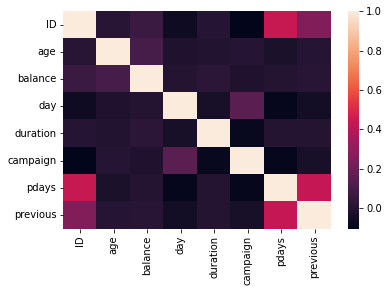

In [93]:
sns.heatmap(ds.corr())

In [94]:
def EDA(name, df) :
    print("== ============================================================")
    print("== EDA : ", name)
    print("== ============================================================")
    
    print(">>> all column info")
    print(df.columns)
    
    print(">>> inlude object column info")
    print(df.select_dtypes(include=object).columns)
    for col in df.select_dtypes(include=object).columns :
        print("-- ------------------------------------------------------------")
        print(col, "-", df[col].nunique(), " : ", df[col].unique())
        print(df[col].value_counts())
        print("null check : ", df[col].isnull().sum())
        
    print(">>> exclude object column info")
    print(df.select_dtypes(exclude=object).columns)
    for col in df.select_dtypes(exclude=object).columns :
        print("-- ------------------------------------------------------------")
        print(col, "-", df[col].unique()[:10])
        print(df[col].describe())
        print("null check : ", df[col].isnull().sum())
    
    print("== ============================================================")
    print(df.isnull().sum())
    print(df.info())
    print(df.describe())
    print("== ============================================================\n\n")

In [95]:
EDA("Train Dataset",ds)

== ============================================================
== EDA :  Train Dataset
== ============================================================
>>> all column info
Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')
>>> inlude object column info
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')
-- ------------------------------------------------------------
job - 12  :  ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
ho

In [96]:
object_columns = df.columns
object_columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'duration',
       'pdays', 'subscribed'],
      dtype='object')

In [97]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [98]:
for column in object_columns:
    ds[column] = label_encoder.fit_transform(ds[column])
ds

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,38,0,married,unknown,0,2719,0,0,telephone,19,nov,43,2,0,0,unknown,0
1,40576,13,11,married,secondary,0,822,0,0,cellular,20,jul,90,2,0,0,unknown,0
2,15320,9,7,married,secondary,0,1709,1,0,cellular,18,jul,239,1,0,0,unknown,0
3,43962,39,4,divorced,tertiary,0,3815,0,0,cellular,22,jun,864,1,79,3,success,1
4,29842,13,9,married,secondary,0,938,1,0,cellular,4,feb,379,1,0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,11,4,single,tertiary,0,819,1,0,cellular,12,may,115,2,0,0,unknown,0
31643,40178,35,4,divorced,tertiary,0,1199,0,1,cellular,5,jun,437,2,0,0,unknown,1
31644,19710,14,4,single,tertiary,0,1131,0,0,cellular,7,aug,36,3,0,0,unknown,0
31645,38556,39,9,married,secondary,0,1044,1,0,telephone,15,may,21,7,332,12,failure,0


In [99]:
ds = ds.drop(['ID', 'marital', 'education','contact', 'day', 'month', 'campaign', 'previous', 'poutcome'],axis=1)
ds

,age,job,default,balance,housing,loan,duration,pdays,subscribed
0,38,0,0,2719,0,0,43,0,0
1,13,11,0,822,0,0,90,0,0
2,9,7,0,1709,1,0,239,0,0
3,39,4,0,3815,0,0,864,79,1
4,13,9,0,938,1,0,379,0,0
...,...,...,...,...,...,...,...,...,...
31642,11,4,0,819,1,0,115,0,0
31643,35,4,0,1199,0,1,437,0,1
31644,14,4,0,1131,0,0,36,0,0
31645,39,9,0,1044,1,0,21,332,0


In [101]:
ds1=pd.read_csv('train_1.csv')

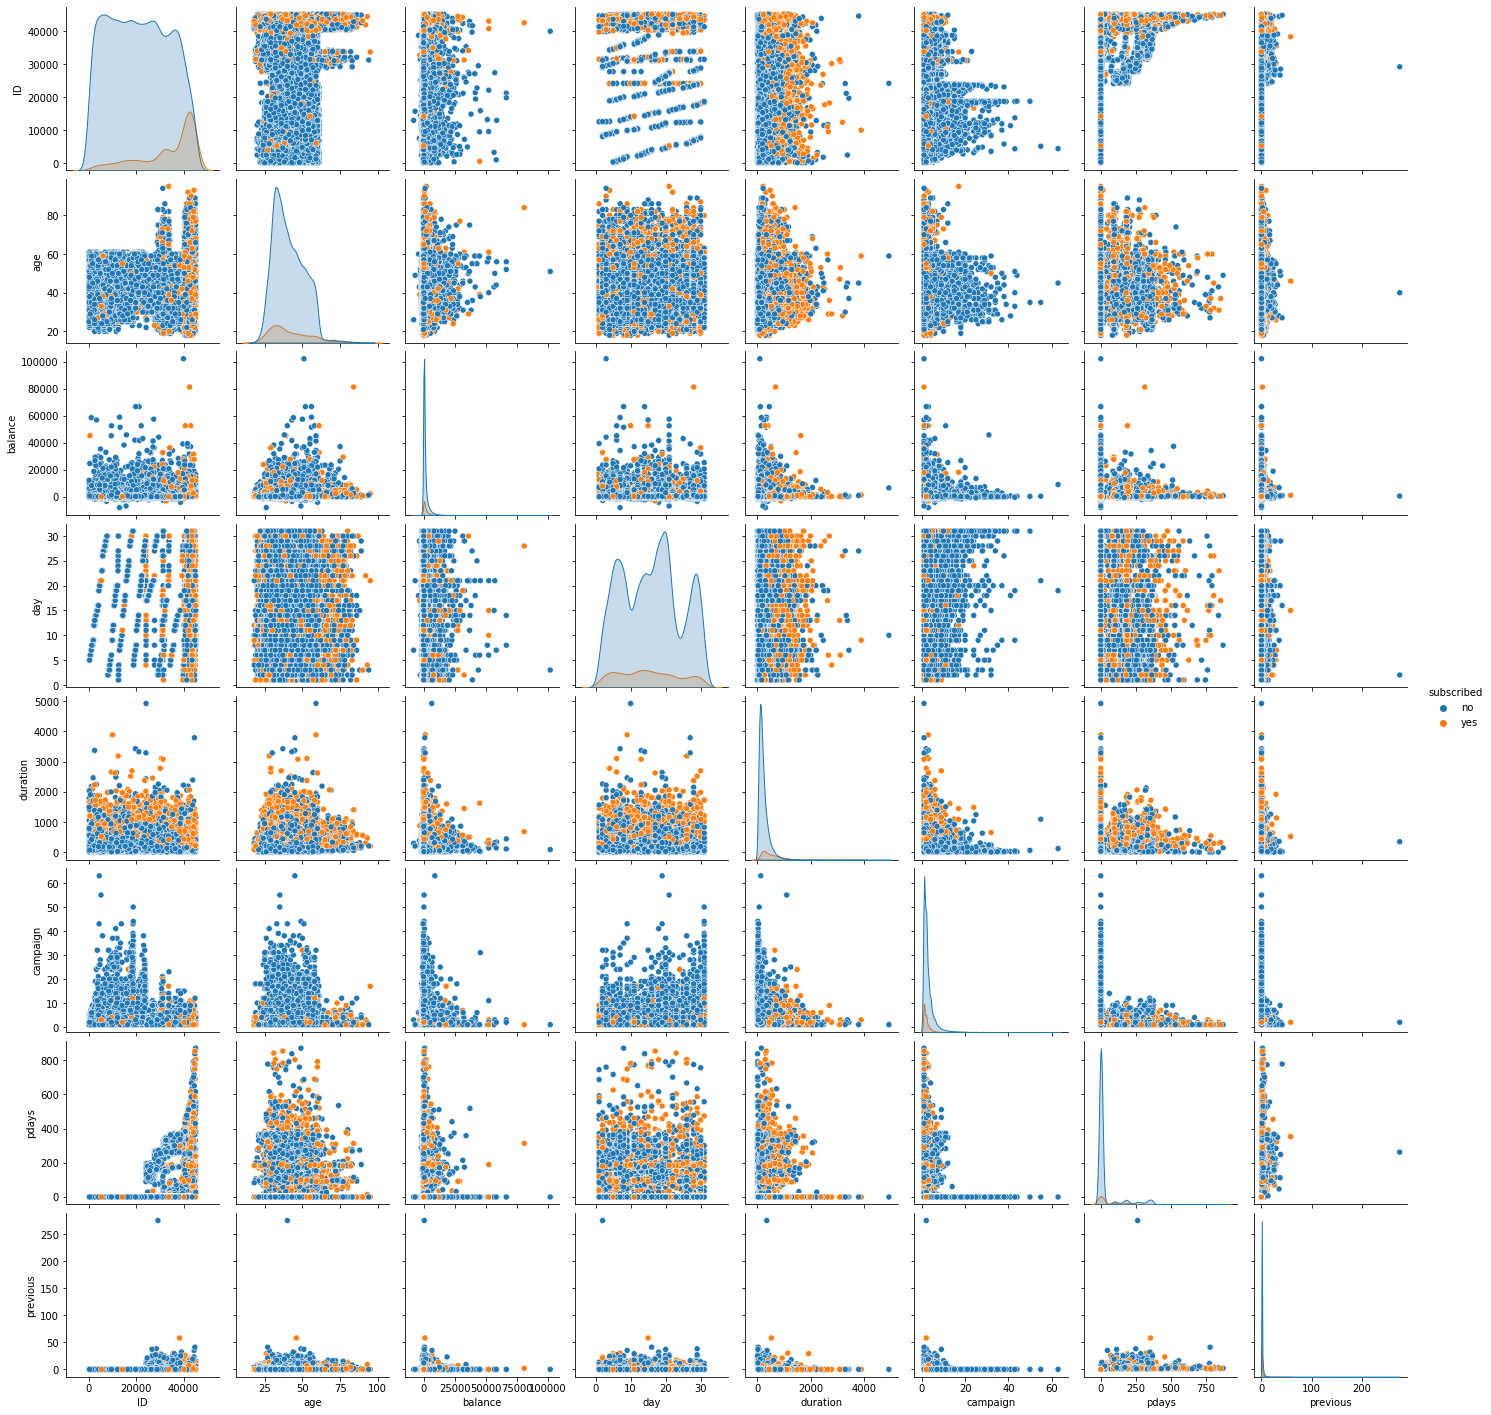

In [102]:
sns.pairplot(ds1,hue='subscribed')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


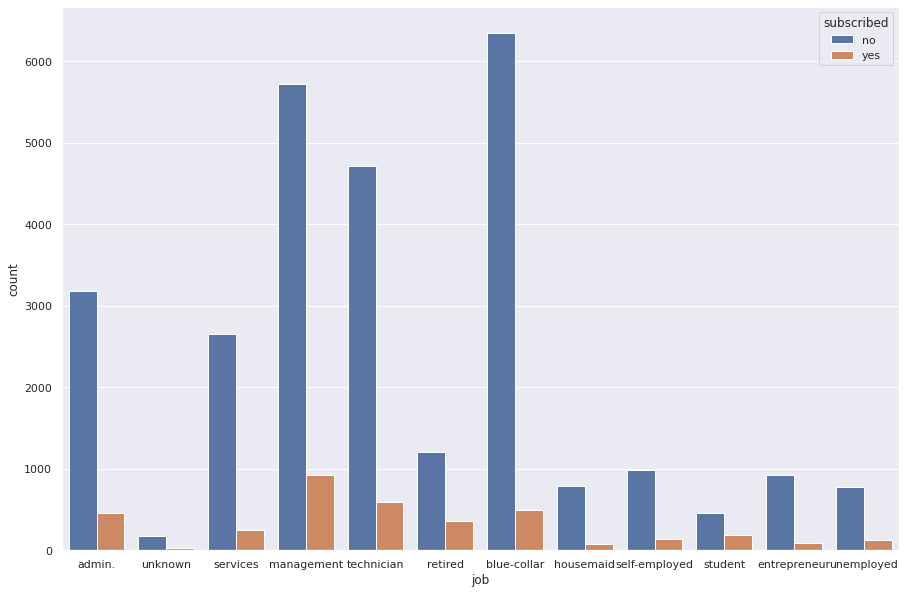

In [109]:
sns.countplot(ds1['job'],hue=ds1['subscribed'])
sns.set(rc={"figure.figsize":(30,10)})


In [112]:
ds.columns

Index(['age', 'job', 'default', 'balance', 'housing', 'loan', 'duration',
       'pdays', 'subscribed'],
      dtype='object')

In [113]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         31647 non-null  int64
 1   job         31647 non-null  int64
 2   default     31647 non-null  int64
 3   balance     31647 non-null  int64
 4   housing     31647 non-null  int64
 5   loan        31647 non-null  int64
 6   duration    31647 non-null  int64
 7   pdays       31647 non-null  int64
 8   subscribed  31647 non-null  int64
dtypes: int64(9)
memory usage: 2.2 MB


In [118]:
X = ds.iloc[:,0:-1]
Y = ds.iloc[:,-1]

In [125]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Naive Bayes Algorithm to Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predicting Test set results
Y_pred = classifier.predict(X_test)

# Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

acc = classifier.score(X_test,Y_test)*100
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 87.99%


In [126]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      6946
           1       0.51      0.40      0.45       966

    accuracy                           0.88      7912
   macro avg       0.71      0.67      0.69      7912
weighted avg       0.87      0.88      0.87      7912



In [120]:
cm

array([[6577,  369],
       [ 581,  385]])